# Assignment Instructions:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) or you can also run the below cell and load the data directly. 
2. Perform a similar anlaysis as done in the reference notebook on this dataset.


In [ ]:
import pandas as pd
# we can read the data directly from raw github link
# we are also defining the name of the columns.
#make sure that your csv file and ipynb notebook are in the same folder. If they are in different folder then you have to define the complete path
from google.colab import files
uploaded = files.upload()
df=pd.read_csv('haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"])
df.head()

Saving haberman.csv to haberman.csv


,age,operation_Year,axil_nodes,survival_status
0,age,year,nodes,status
1,30,64,1,1
2,30,62,3,1
3,30,65,0,1
4,31,59,2,1


### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
- You have to write all of your observations in Markdown cell with proper formatting.You can go through the following blog to understand formatting in markdown cells - https://www.markdownguide.org/basic-syntax/
- Do not write your observations as comments in code cells.
- Write comments in your code cells in order to explain the code that you are writing. Proper use of commenting can make code maintenance much easier, as well as helping make finding bugs faster. 
- You can add extra cells using <b>Insert cell below command</b> in Insert tab. You can also use the shortcut Alt+Enter
- It is a good programming practise to define all the libraries that you would be using in a single cell

In [ ]:
df = df.iloc[1: , :]

In [ ]:
df['survival_status'] = df['survival_status'].map({'1':1, '2':0})      #replacing surviving status 1(more than 5 yrs) as 1 and 2(less than 5 yrs) as 0

In [ ]:
df.head()

,age,operation_Year,axil_nodes,survival_status
1,30,64,1,1
2,30,62,3,1
3,30,65,0,1
4,31,59,2,1
5,31,65,4,1


In [ ]:
print(df.shape)

(306, 4)


In [ ]:
print(df.columns)

Index(['age', 'operation_Year', 'axil_nodes', 'survival_status'], dtype='object')


In [ ]:
convert_dict = {'age': int,                   #converting data types into int for visualization of dataset
                'operation_Year': int,
                'axil_nodes': int,
                'survival_status': int
               }

In [ ]:
df = df.astype(convert_dict)
print(df.dtypes)

age                int64
operation_Year     int64
axil_nodes         int64
survival_status    int64
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 1 to 306
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              306 non-null    int64
 1   operation_Year   306 non-null    int64
 2   axil_nodes       306 non-null    int64
 3   survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [ ]:
df["survival_status"].value_counts()

1    225
0     81
Name: survival_status, dtype: int64

In [ ]:
df.describe()

,age,operation_Year,axil_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


OBSERVATIONS:- 

Haberman dataset has more no. of positive data points and less no. of negative data points.

Majority of patients having cancer are from 35 yrs to 70 yrs of age.

Patients of age group between 71 yrs to 80 yrs are very less.

### 1.2 - Explain the objective of the problem.
(The objective for a problem can be defined as a brief explanation of problem that you are trying to solve using the given dataset)

In [ ]:
#Given the haberman dataset we are trying to - 1.) analise the number patients who have survived after the operation and who died after operations
                                           #   2.) we are trying to analyze the what causes death of patients(more number of axil nodes)
                                           #   3) trying to established a relationship between survival/death of patients with some important factor or features

### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots
- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each plot.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


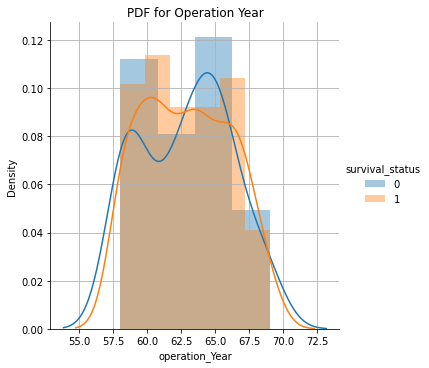

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
sns.FacetGrid(df, hue="survival_status", height=5) \
   .map(sns.distplot, "operation_Year") \
   .add_legend();
plt.title('PDF for Operation Year')
plt.grid() 
plt.show();

OBSERVATION:-

Operation year completely overlap with each other hence we can not predict anything from this projection clearly.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


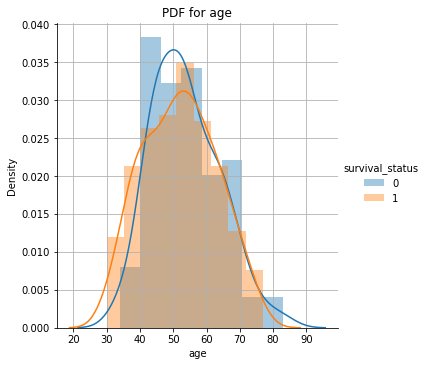

In [ ]:
sns.FacetGrid(df, hue="survival_status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('PDF for age')
plt.grid() 
plt.show();

OBSERVATION:-
1. People of age 40 to 50 have higher chances to die within 5 years of operation.
2. People of age group 30 to 40 are having more chances of survival.
3. This graph also overlap with survival status so its difficult to predict. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


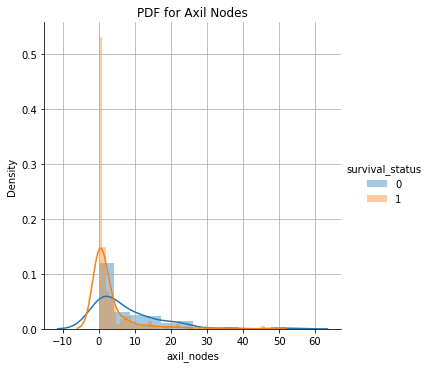

In [ ]:
sns.FacetGrid(df, hue="survival_status", height=5) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();
plt.grid() 
plt.title('PDF for Axil Nodes')
plt.show();

OBSERVATIONS:-

1. Out of age,operation_year and axil nodes, axil nodes are more useful feature than other two.
2. Survival chances increases as less number of axil nodes are there.
3. Survival chance is maximun when axil nodes are 0

pdf : [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
bin edges : [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


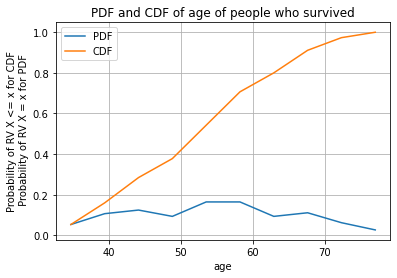

In [ ]:
#plotting of cdf 
survived = df.loc[df["survival_status"] == 1]
counts, bin_edges = np.histogram(survived['age'], bins=10, density = True)
pdf = counts/(sum(counts))     #pdf
print("pdf :",pdf);
print("bin edges :" , bin_edges);
cdf = np.cumsum(pdf)       #cdf

plt.xlabel("age")
plt.ylabel('Probability of RV X <= x for CDF\n Probability of RV X = x for PDF')
plt.title('PDF and CDF of age of people who survived')
plt.plot(bin_edges[1:],pdf, label ='PDF')
plt.plot(bin_edges[1:], cdf, label ='CDF')
plt.legend()
plt.grid() 


plt.show();

pdf : [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
bin edges : [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


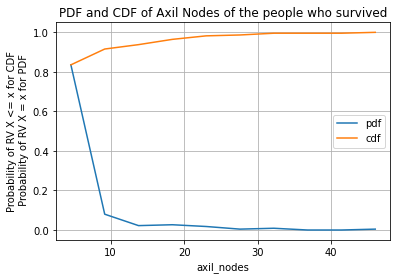

In [ ]:
#plotting of cdf for axil nodes and survival status==1

survived = df.loc[df["survival_status"] == 1]
counts, bin_edges = np.histogram(survived['axil_nodes'], bins=10, density = True)

pdf = counts/(sum(counts))     #pdf
print("pdf :",pdf);
print("bin edges :",bin_edges);

cdf = np.cumsum(pdf)           #cdf

plt.plot(bin_edges[1:],pdf,label="pdf")
plt.plot(bin_edges[1:], cdf,label='cdf')
plt.xlabel('axil_nodes')
plt.ylabel('Probability of RV X <= x for CDF\n Probability of RV X = x for PDF')
plt.legend()
plt.title('PDF and CDF of Axil Nodes of the people who survived')
plt.grid() 
plt.show();

OBSERVATIONS:-
1. People having less than 5 axil nodes detected are having more than 80% chance of survival.
2. Increase in number of axil nodes, chances of survival decreases.

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


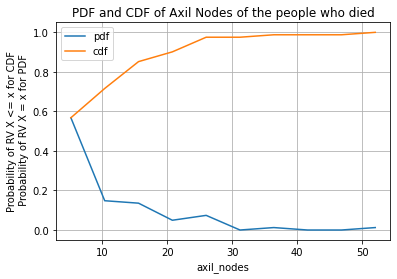

In [ ]:
#plotting cdf for survival_status==0 and axil nodes.

died = df.loc[df["survival_status"] == 0]
counts, bin_edges = np.histogram(died['axil_nodes'], bins=10, density = True)

pdf = counts/(sum(counts))     #pdf
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)          #cdf

plt.plot(bin_edges[1:],pdf,label="pdf")
plt.plot(bin_edges[1:], cdf,label="cdf")
plt.xlabel('axil_nodes')
plt.ylabel('Probability of RV X <= x for CDF\n Probability of RV X = x for PDF')
plt.legend()
plt.title('PDF and CDF of Axil Nodes of the people who died')
plt.grid()
plt.show();

pdf of survived people : [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
bin edges : [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
pdf of died people : [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
bin edges : [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


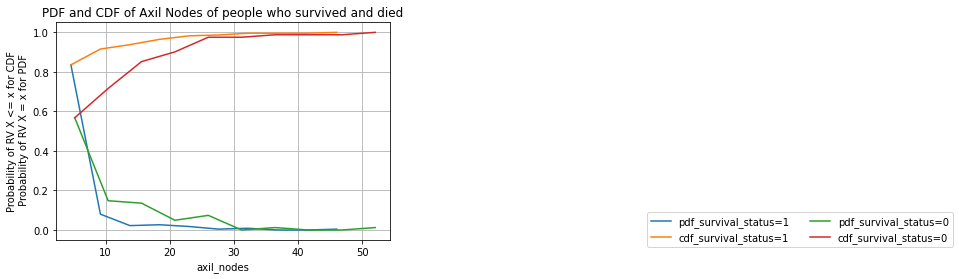

In [ ]:
#plotting of cdf for axil nodes and survival status==1 and 0

survived = df.loc[df["survival_status"] == 1]
counts, bin_edges = np.histogram(survived['axil_nodes'], bins=10, density = True)

pdf = counts/(sum(counts))     #pdf
print("pdf of survived people :",pdf);
print("bin edges :",bin_edges);

cdf = np.cumsum(pdf)           #cdf

plt.plot(bin_edges[1:],pdf,label="pdf_survival_status=1")
plt.plot(bin_edges[1:], cdf,label='cdf_survival_status=1')
plt.xlabel('axil_nodes')
plt.ylabel('Probability of RV X <= x for CDF\n Probability of RV X = x for PDF')


#plotting cdf for survival_status==0 and axil nodes.

died = df.loc[df["survival_status"] == 0]
counts, bin_edges = np.histogram(died['axil_nodes'], bins=10, density = True)

pdf = counts/(sum(counts))     #pdf
print("pdf of died people :",pdf);
print("bin edges :",bin_edges);

cdf = np.cumsum(pdf)          #cdf

plt.plot(bin_edges[1:],pdf,label="pdf_survival_status=0")
plt.plot(bin_edges[1:], cdf,label="cdf_survival_status=0")
#plt.xlabel('axil_nodes')
#plt.legend()
plt.legend(bbox_to_anchor =(1.75, 0.15), ncol = 2)
plt.grid()
plt.title('PDF and CDF of Axil Nodes of people who survived and died')
plt.show();

In [ ]:
print("Means(survived):")
print('age: ', np.mean(survived['age']))
print('axil_nodes: ', np.mean(survived['axil_nodes']))

print("\nMeans(died):")
print('age:', np.mean(died['age']))
print('axil_nodes: ', np.mean(died['axil_nodes']))

print("\nStd-dev(survived):");
print('age: ',np.std(survived['age']))
print('axil_nodes: ',np.std(survived['axil_nodes']))

print("\nStd-dev(died):");
print('age: ',np.std(died['age']))
print('axil_nodes: ' ,np.std(died['axil_nodes']))

Means(survived):
age:  52.01777777777778
axil_nodes:  2.7911111111111113

Means(died):
age: 53.67901234567901
axil_nodes:  7.45679012345679

Std-dev(survived):
age:  10.98765547510051
axil_nodes:  5.857258449412131

Std-dev(died):
age:  10.10418219303131
axil_nodes:  9.128776076761632


In [ ]:
df.describe()        #here also we can get the mean,median,std_deaviation and inter quatile ranges(25th,50th and 75th)

,age,operation_Year,axil_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [ ]:
print("\nMedians(survived):")
print('age :' ,np.median(survived['age']))
print('axil_nodes: ',np.median(survived['axil_nodes']))
print("\nMedians(died):")
print('age: ',np.median(died['age']))
print('axil_nodes: ',np.median(died['axil_nodes']))


print("\nQuantiles(survived):")
print('age :',np.percentile(survived['age'],np.arange(0, 100, 25)))
print('axil_nodes :',np.percentile(survived['axil_nodes'],np.arange(0, 100, 25)))

print("\nQuantiles(died):")
print('age :',np.percentile(died['age'],np.arange(0, 100, 25)))
print('axil_nodes :',np.percentile(died['axil_nodes'],np.arange(0, 100, 25)))

print("\n90th Percentiles(survived):")
print('age :',np.percentile(survived['age'],90))
print('axil_nodes :',np.percentile(survived['axil_nodes'],90))

print("\n90th Percentiles(died):")
print('age: ',np.percentile(died['age'],90))
print('axil_nodes: ',np.percentile(died['axil_nodes'],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation(survived)")
print('age: ',robust.mad(survived['age']))
print('axil_nodes: ',robust.mad(survived['axil_nodes']))

print ("\nMedian Absolute Deviation(died)")
print('age: ',robust.mad(died['age']))
print('axil_nodes :',robust.mad(died['axil_nodes']))


Medians(survived):
age : 52.0
axil_nodes:  0.0

Medians(died):
age:  53.0
axil_nodes:  4.0

Quantiles(survived):
age : [30. 43. 52. 60.]
axil_nodes : [0. 0. 0. 3.]

Quantiles(died):
age : [34. 46. 53. 61.]
axil_nodes : [ 0.  1.  4. 11.]

90th Percentiles(survived):
age : 67.0
axil_nodes : 8.0

90th Percentiles(died):
age:  67.0
axil_nodes:  20.0

Median Absolute Deviation(survived)
age:  13.343419966550417
axil_nodes:  0.0

Median Absolute Deviation(died)
age:  11.860817748044816
axil_nodes : 5.930408874022408


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


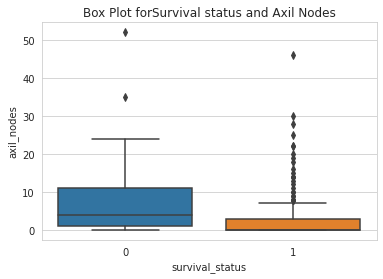

In [ ]:
sns.boxplot(x='survival_status',y='axil_nodes', data=df)
plt.title("Box Plot for Survival status and Axil Nodes")
plt.show()

FOR SURVIVAL STATUS =1
1. People who survived more than 5 years, 25th and 50th percentile is nearly same.
2. Threshold for survival status=1 is 8.

FOR SURVIVAL STATUS=0
1. 25th percentile is below 5 and 50th percentile is between 11 to 15.
2. Threshold is nearly 25.

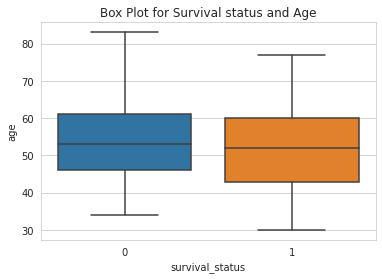

In [ ]:
sns.boxplot(x='survival_status',y='age', data=df)
plt.title("Box Plot for Survival status and Age")
#plt.grid()
plt.show()

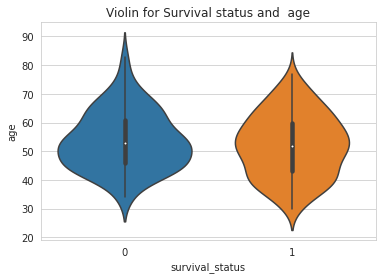

In [ ]:
sns.violinplot(x="survival_status", y="age", data=df, size=8)
plt.title("Violin for Survival status and  age")

plt.show()

1. From the voilin plot we can get the idea of pdf of survival status.
2. We can get the idea of quntile ranges (25th, 50th and 75th)

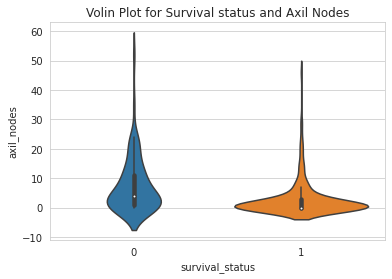

In [ ]:
sns.violinplot(x="survival_status", y="axil_nodes", data=df, size=8)
plt.title("Volin Plot for Survival status and Axil Nodes")
plt.show()

1. Density for survival status=0 is more around  0 to 15.
2. Density for survival status=1 is more around 0 to 7.

### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each  plot.


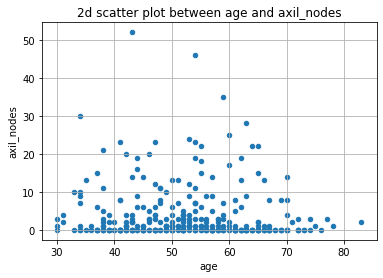

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df.plot(kind='scatter', x='age', y='axil_nodes') ;
plt.title('2d scatter plot between age and axil_nodes')
plt.grid()
plt.show()

1. From the above graph we can say that very less patients have axil nodes more than 30 and majority patients have axil nodes between 0 to 10.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


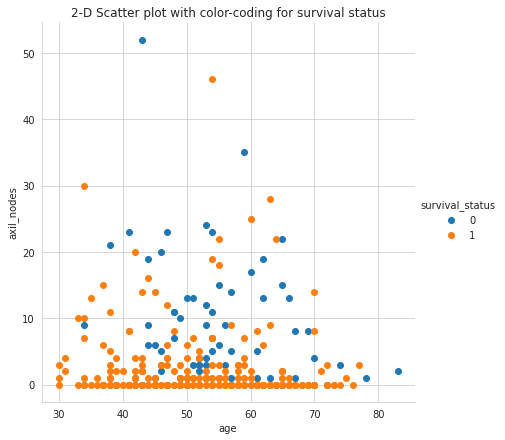

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="survival_status", size=6) \
   .map(plt.scatter, "age", "axil_nodes") \
   .add_legend();
plt.title('2-D Scatter plot with color-coding for survival status')
plt.show();

OBSERVATIONS:-

1. From the above plot we can say that the patients who have less axil nodes detected have higher chance of survival as compared to patients who have more number of axil nodes detected.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


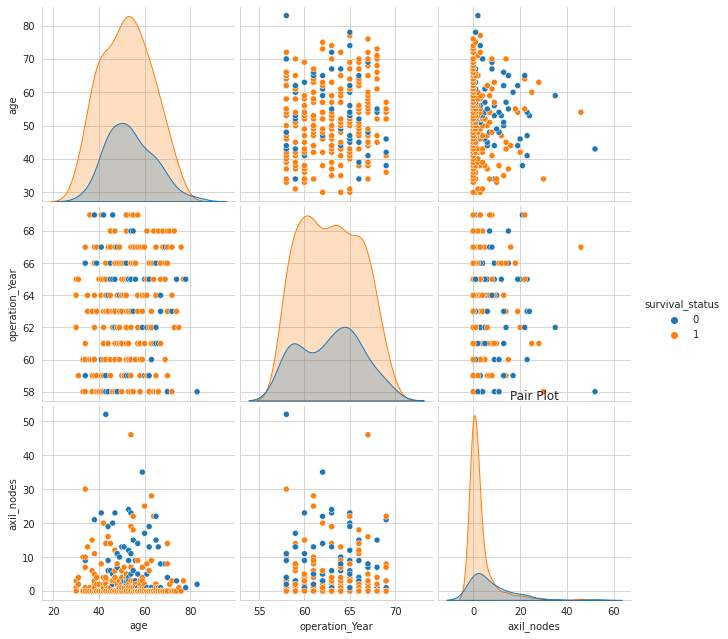

In [ ]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="survival_status", size=3);
plt.title("Pair Plot")
plt.show()

### 1.5 Summarize your final conclusions of the Exploration
- You can desrcibe the key features that are important for the Classification task.
- Try to quantify your results i.e. while writing observations include numbers,percentages, fractions etc.
- Write a brief of your exploratory analysis in 3-5 points
- Write your observations in english as crisply and unambigously as possible.

# SUMMARY:-
# From  PDF and CDF 
1. Operation year and age are not useful feature in making conclusion.

2. Axil nodes and survival status are important feature to analyse the data set.

3. Patients who have number of axil nodes =0  detected, have higher chance of survival.

4. People having less than 5 axil nodes detected are having more than 80% chance of survival.

5. More than 55% of people who died have axil nodes less than 10.


#From Pair Plot and Scatter plot
1. Large number of people who survived have axil nodes between 0 to 10 of age group 30 to 75 years.

2. People having axil nodes 10 to 30 are likely to die.
3. Age and axil nodes are good feature to analyse the dataset.

#From  statistical analysis

1. Pateints who survived, the inter quantile range(25th,50th,75th and 100th) for their ages are: [30. 43. 52. 60.] which means 25% of people who survived have age less than 30 years , 50% of people who survived have age less than 43 years ,75% of people who survived have age less than 52 years and 100% of people who have survived have age less than 60.

2. Pateints who survived, the inter quantile range(25th,50th,75th and 100th) of axil nodes are : [0. 0. 0. 3.], which means 25% of people who survived have axil nodes less than 0, 50% of people who survived have axil nodes less than 0, 75% of people who survived have axil nodes less than 0 and 100% of people who survived have axil nodes less than 3.

3. People who survived having 90th percentile as 67 years and axil nodes as 8 , which means 90% of the people who survived are having age less than 67 years and axil nodes less than 8.

4. Patients who died within 5 years , the inter quantile range(25th,50th,75th and 100th) are age : [34. 46. 53. 61.]  which means 25% of people who died have age less than 34 years , 50% of people who died have age less than 46 years ,75% of people who died have age less than 53 years and 100% of people who have died have age less than 61.

5.  Pateints who died, the inter quantile range(25th,50th,75th and 100th) of axil nodes: [ 0.  1.  4. 11.] ,which means 25% of people who died have axil nodes less than 0, 50% of people who died have axil nodes less than 1, 75% of people who died have axil nodes less than 4 and 100% of people who died have axil nodes less than 11.

6. People who survived having 90th percentile as 67 years and axil nodes as 20 , which means 90% of the people who survived are having age less than 67 years and axil nodes less than 20.


# From Violin Plot
1. People who survived after operation are having age from 22 to 83 years.
2. People who survived have interquantile range for age is [43,52,60]
3. Highest density for age of people who survived is around 53 years while people who died is around 50 years.
4. People who died after operation are having age  from 25 years to 91 years.
5. For axil nodes people who survived have more number of axil nodes around 0-7 years.
6. For axil nodes people who died have more number of axil nodes around 0-15 years.

#From Box Plot
1. Axil nodes of people who survied  have number of axil nodes 25th and 50th percentile nearly same and 75th percentile less than 5.
2. Axil nodes of people who died have number of axil nodes 25th percentile less than 2 ,50th percentile as 5 and 75th percentile as 12.
3. Age of people who survived have 25th percentile as 43 ,50th percentile as 52 and 75th percentile as 60 years.
4. Age of people who died have 25th percentile as 46,50th percentile as 53 and 75th percentile as 62 years. 